# Mitro 209 Project by Baptiste Daumen

## Densest subgraph approximation algorithm

### Import 

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import timeit
import numpy as np

### Graph class

In [2]:
n_cours = 10
m_cours = 16
G_cours = [[1,2,4,5], [0,2,3,4,5], [0,1,4,5], [1,6,7,8,9], [0,1,2,5,6], [0,1,2,4], [3,4], [3], [3], [3]]

### Algorithm to find the approximation of a densest subgraph

In [3]:
# The documentation of the algorithm is in the report

def densest_subgraph(G) :

    n = len(G) 

    nb_of_edges_updated = 0 

    nb_of_vertices_updated = n 

    rho_G_updated = 0 

    min_degree = 0 

    number_of_steps = 0 
    
    index_vertices_to_erase = 0 

    vertices_erased = [] 
    
    vertices_by_degree = [] 

    vertices_data = []

    for i in range(n): 

        vertices_data.append([len(G[i]), 0, 0]) 
        vertices_by_degree.append([]) 
           
    for i in range(n): 

        vertices_data[i][2] = len(vertices_by_degree[len(G[i])]) 
        vertices_by_degree[len(G[i])].append(i) 
    
    for i in range(n): 

        nb_of_edges_updated += vertices_data[i][0] 

    nb_of_edges_updated = nb_of_edges_updated // 2 

    min_degree = min(i for i in range(n) if vertices_by_degree[i] != []) 

    rho_G_updated = nb_of_edges_updated / nb_of_vertices_updated 


    while (nb_of_edges_updated > 0): 

        number_of_steps += 1 

        vertex_processed = vertices_by_degree[min_degree][-1] 
            
        vertices_erased.append(vertex_processed) 
        vertices_data[vertex_processed][1] = 1 

        vertices_by_degree[min_degree].pop() 
    
        for i in range(len(G[vertex_processed])): 
            e = G[vertex_processed][i]
            if vertices_data[e][1] == 0: 
                vertices_by_degree[vertices_data[e][0]][vertices_data[e][2]] = vertices_by_degree[vertices_data[e][0]][-1] 
                vertices_data[vertices_by_degree[vertices_data[e][0]][-1]][2] = vertices_data[e][2] 
                vertices_by_degree[vertices_data[e][0]].pop() 
                vertices_by_degree[vertices_data[e][0]-1].append(e) 
                vertices_data[e][0] -= 1 
                vertices_data[e][2] = len(vertices_by_degree[vertices_data[e][0]]) - 1
                
        nb_of_vertices_updated -= 1 
        nb_of_edges_updated -= min_degree 

        if(rho_G_updated < nb_of_edges_updated / nb_of_vertices_updated): 
            rho_G_updated = nb_of_edges_updated / nb_of_vertices_updated 
            index_vertices_to_erase = number_of_steps  
        

        if min_degree != 0 : 
            start_point = min_degree - 1 
        else : 
            start_point = 0 

        for i in range (start_point, n): 
                if(vertices_by_degree[i] != []):
                    min_degree = i
                    break
        

    vertices_erased.append(vertices_by_degree[min_degree][0]) 

    return len(vertices_erased[index_vertices_to_erase::]), rho_G_updated

### Graph Social circles: Facebook

In [4]:
n_1 = 4039
m_1 = 88234

"""

G_1 = []
for i in range(n_1):
    G_1.append([])

df_1 = pd.read_csv('facebook_combined.txt', sep=' ', header=None, dtype=int)

for index, row in df_1.iterrows():
    G_1[row[0]].append(row[1])
    G_1[row[1]].append(row[0])

# Open a file for writing
with open("facebook_combined.pkl", "wb") as file:
    pickle.dump(G_1, file)
    
"""

# Open a file for reading
with open("facebook_combined.pkl", "rb") as file:
    G_1 = pickle.load(file)

### Graph EU email communication network

In [5]:
n_2 = 265214
m_2 = 420045

"""

G_2 = []
for i in range(n_2):
    G_2.append([])

df_2 = pd.read_csv("Email-EuAll.txt", delimiter="\t", header=None, names=["FromNodeId", "ToNodeId"], skiprows=4, dtype=int)

for index, row in df_2.iterrows():
    G_2[int(row[0])].append(int(row[1]))

with open("Email-EuAll.pkl", "wb") as file:
    pickle.dump(G_2, file)

"""

# Open a file for reading
with open("Email-EuAll.pkl", "rb") as file:
    G_2 = pickle.load(file)

### Graph Gnutella peer-to-peer network, August 31 2002

In [6]:
n_3 = 62586
m_3 = 147892

"""

G_3 = []
for i in range(n_3):
    G_3.append([])

df_3 = pd.read_csv("p2p-Gnutella31.txt", delimiter="\t", header=None, skiprows=4, dtype=int)

for index, row in df_3.iterrows():
    G_3[row[0]].append(row[1])

# Open a file for writing
with open("p2p-Gnutella31.pkl", "wb") as file:
    pickle.dump(G_3, file)
    
"""

# Open a file for reading
with open("p2p-Gnutella31.pkl", "rb") as file:
    G_3 = pickle.load(file)

### Graph Slashdot social network, November 2008

In [7]:
n_4 = 77360
m_4 = 905468

"""

G_4 = []
for i in range(n_4):
    G_4.append([])

df_4 = pd.read_csv("Slashdot0811.txt", delimiter = "\t", sep=' ', header=None, skiprows=4, dtype=int)

for index, row in df_4.iterrows():
    G_4[row[0]].append(row[1])

# Open a file for writing
with open("Slashdot0811.pkl", "wb") as file:
    pickle.dump(G_4, file)

"""

with open("Slashdot0811.pkl", "rb") as file:
    G_4 = pickle.load(file)

### Graph Deezer Europe Social Network

In [8]:
n_5 = 28281
m_5 = 92752

"""

G_5 = []
for i in range(n_5):
    G_5.append([])

df_5 = pd.read_csv("deezer_europe_edges.txt", delimiter ="\t", sep=' ', header=None, dtype=int, skiprows=1)

for index, row in df_5.iterrows():
    G_5[row[0]].append(row[1])
    G_5[row[1]].append(row[0])

# Open a file for writing
with open("deezer_europe_edges.pkl", "wb") as file:
    pickle.dump(G_5, file)

"""
with open("deezer_europe_edges.pkl", "rb") as file:
    G_5 = pickle.load(file)

### Results of the algorithm on the five graphs

In [9]:
print(densest_subgraph(G_1))
print("")

print(densest_subgraph(G_2))
print("")

print(densest_subgraph(G_3))
print("")

print(densest_subgraph(G_4))
print("")

print(densest_subgraph(G_5))
print("")

(202, 77.34653465346534)

(205730, 0.9317412502717307)

(8656, 4.906697395069488)

(3262, 25.695055594984623)

(150, 8.533333333333333)



### Benchmarks

In [10]:
number_of_test = 1 # Number of tests of the algorithm (can be modified)

running_time_1 = timeit.timeit("densest_subgraph(G_1)", setup="from __main__ import densest_subgraph, G_1", number=number_of_test) / number_of_test

running_time_2 = timeit.timeit("densest_subgraph(G_2)", setup="from __main__ import densest_subgraph, G_2", number=number_of_test) / number_of_test

running_time_3 = timeit.timeit("densest_subgraph(G_3)", setup="from __main__ import densest_subgraph, G_3", number=number_of_test) / number_of_test

running_time_4 = timeit.timeit("densest_subgraph(G_4)", setup="from __main__ import densest_subgraph, G_4", number=number_of_test) / number_of_test

running_time_5 = timeit.timeit("densest_subgraph(G_5)", setup="from __main__ import densest_subgraph, G_5", number=number_of_test) / number_of_test

### Plot


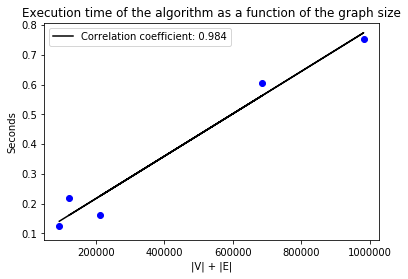

In [11]:
x = [n_1 + m_1, n_2 + m_2, n_3 + m_3, n_4 + m_4, n_5 + m_5]
y = [running_time_1, running_time_2, running_time_3, running_time_4, running_time_5]

corr, _ = pearsonr(x, y)
plt.title('Execution time of the algorithm as a function of the graph size')

coefficients = np.polyfit(x, y, 1)

f = np.poly1d(coefficients)

plt.scatter(x, y, color='b')
plt.plot(x, f(x), color='k')
plt.xlabel('|V| + |E|')
plt.ylabel('Seconds')

plt.legend(['Correlation coefficient: {:.3f}'.format(corr)], loc='upper left')

plt.show()